<a href="https://colab.research.google.com/github/nonoumasy/honey-bee-production-1998-2012/blob/master/Honey_Bee_Production_19989_2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook Contents:

* Imports
* Problem statement
* Dataset
* Exploratory Data Analysis(EDA)
  * Pandas Profiling
  * Time Series Analysis
  * Slope Chart
  * Geospatial Analysis(Map)
* Feature Engineering
* Model Time: 
    * Model Selection 
    * Model Validation
    * Model Tuning
    * Result
* Forecasting
* References

# Imports

In [63]:
!pip install pandas-profiling
!pip install -U plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.5.2)


In [0]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import folium
import plotly.offline
import plotly.express as px
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Problem Statement

Analyze Honey Bee Production data
Forecast Production 

# Dataset

Dataset Description

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|honey_df|US State|
|**numcol**|float64|honey_df|Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year|
|**yieldpercol**|int64|honey_df|Honey yield per colony. Unit is pounds|
|**totalprod**|float64|honey_df|Total production (numcol x yieldpercol). Unit is pounds|
|**stocks**|float64|honey_df|Refers to stocks held by producers. Unit is pounds|
|**priceperlb**|float64|honey_df|Refers to average price per pound based on expanded sales. Unit is dollars.|
|**prodvalue**|float64|honey_df|Value of production (totalprod x priceperlb). Unit is dollars.|
|**year**|int64|honey_df|Year (1998 - 2012)|

In [0]:
honey_df = pd.read_csv('honeyproduction.csv')
honey_df.head(2)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


# Pandas Profiling

In [0]:
pp.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,626
Total Missing (%),0.0%
Total size in memory,39.2 KiB
Average record size in memory,64.2 B
Numeric,5
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import 

Data Source:
https://www.kaggle.com/jessicali9530/honey-production

# EDA

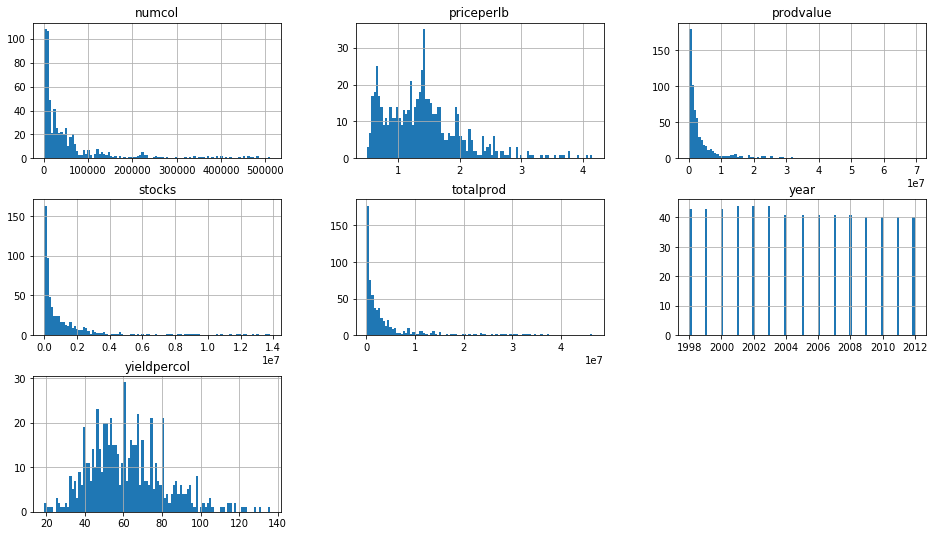

In [0]:
#distribution of variables
honey_df.hist(bins=100, figsize=(16,9));
plt.title('histogram');

We notice some of the variable distribution are not uniformly distributed. There are many reasons why you would want to transform your data to be uniformly distributed. One reason is that it normally(no pun) improves model prediction. So we will have to do this transformation later in the Feature Engineering step.

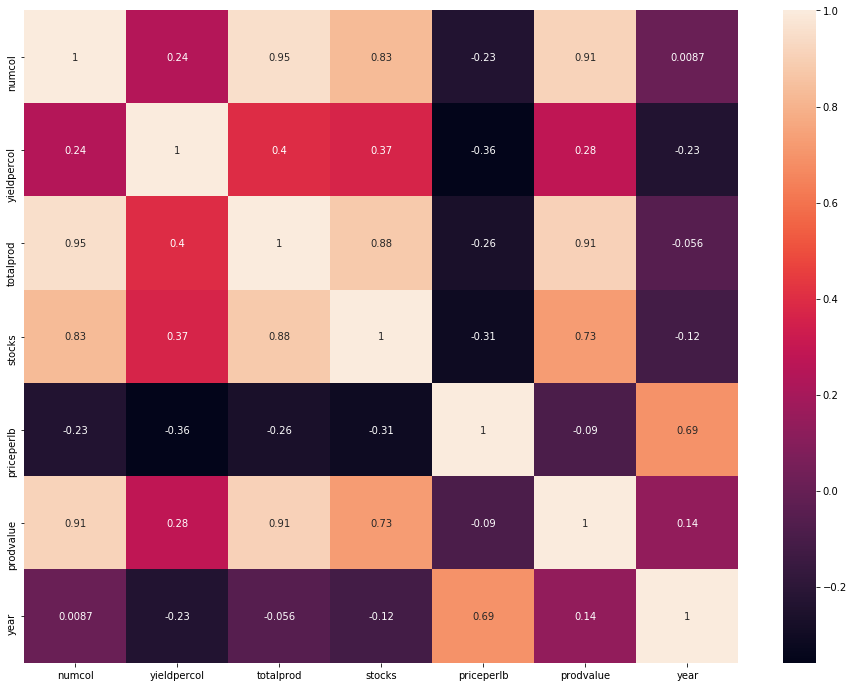

In [0]:
#correlation of variables
plt.figure(figsize=(16,12))
sns.heatmap(honey_df.corr(), annot=True)
plt.show()

!Time Series Analysis

When I decomposed the data, I realized that there is no month data. Therefore, we can't check for seasonality. And the other graphs already confirm a downward trend, such as production and an inverse trend for price per lb. Supply and Demand in action. As production goes down by year, the price per lb. goes up every year.

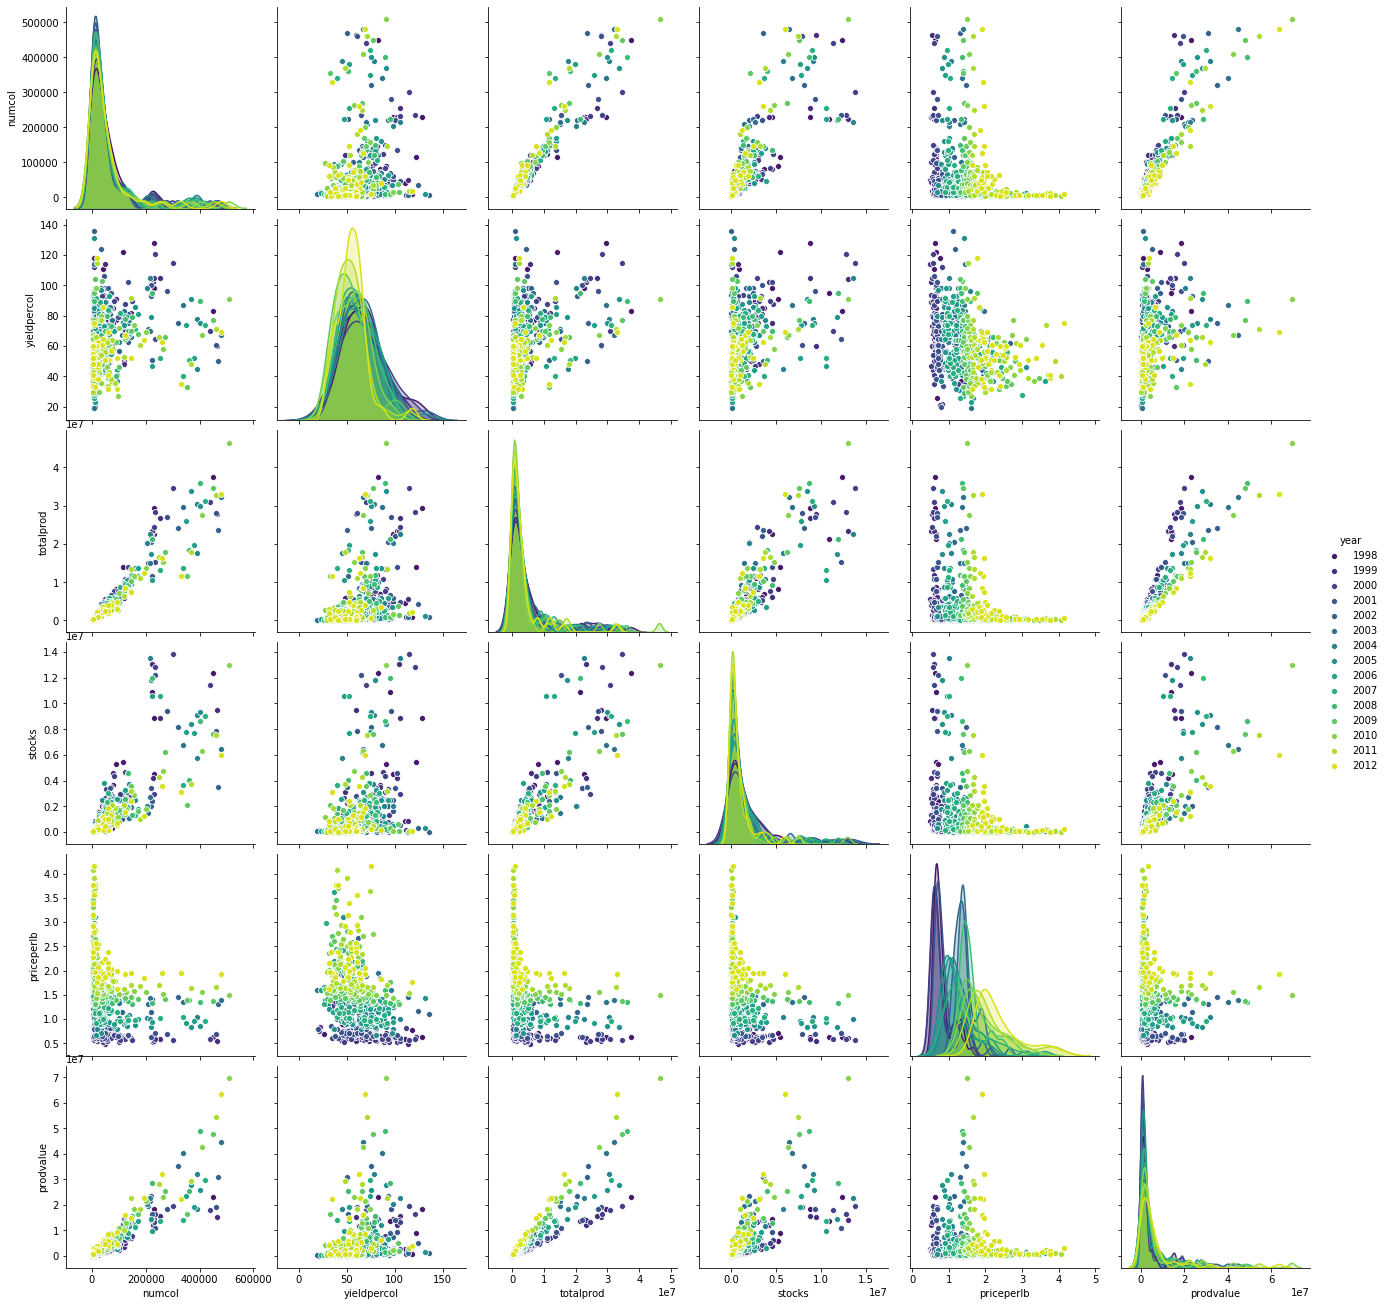

In [0]:
#pair plots grouped by year. 
sns.pairplot(honey_df, hue='year', height=3, palette='viridis');

In [0]:
#year vs state of totalprod crosstab
crosstab_df = pd.crosstab(index=honey_df.state, 
                          columns=honey_df.year,
                          values=honey_df.totalprod, 
                          aggfunc='sum',
                          #margins=True,
                          )

crosstab_df.style.background_gradient('Blues', axis=1).format("{:.0f}")

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
state,,,,,,,,,,,,,,,
AL,1136000,1156000,1248000,1022000,1032000,1066000,1044000,858000,792000,616000,594000,450000,486000,450000,432000
AR,3445000,4628000,4836000,4900000,3960000,3000000,2280000,2484000,2432000,2240000,2100000,1368000,1500000,1408000,1575000
AZ,3300000,3224000,2360000,2537000,2394000,2520000,1760000,1800000,1950000,1920000,1600000,1040000,1848000,1219000,1012000
CA,37350000,27900000,30800000,28060000,23500000,32160000,17550000,30000000,19760000,13600000,18360000,11715000,27470000,17760000,11550000
CO,1944000,2052000,1740000,1430000,1440000,2064000,1840000,1960000,2700000,1581000,1215000,1484000,1904000,1705000,1200000
FL,22540000,23256000,24360000,22000000,20460000,14910000,20090000,13760000,13770000,11360000,11850000,11560000,13800000,10980000,12352000
GA,4200000,3315000,3135000,3135000,2600000,3380000,3087000,2891000,4662000,3480000,4615000,2665000,2530000,2795000,3009000
HI,944000,640000,784000,696000,952000,798000,768000,1179000,930000,920000,900000,950000,770000,666000,750000
IA,3900000,2600000,2010000,1683000,2310000,1888000,2345000,2464000,2184000,2106000,1488000,1092000,1323000,1550000,2257000


In [0]:
#Find out highest and lowest total production rate State and Year
crosstab_df.pct_change(axis=1).style.highlight_max().highlight_min(color='red')

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
state,,,,,,,,,,,,,,,
AL,nan,0.0176056,0.0795848,-0.18109,0.00978474,0.0329457,-0.0206379,-0.178161,-0.0769231,-0.222222,-0.0357143,-0.242424,0.08,-0.0740741,-0.04
AR,nan,0.343396,0.0449438,0.0132341,-0.191837,-0.242424,-0.24,0.0894737,-0.020934,-0.0789474,-0.0625,-0.348571,0.0964912,-0.0613333,0.118608
AZ,nan,-0.0230303,-0.26799,0.075,-0.0563658,0.0526316,-0.301587,0.0227273,0.0833333,-0.0153846,-0.166667,-0.35,0.776923,-0.340368,-0.169811
CA,nan,-0.253012,0.103943,-0.088961,-0.162509,0.368511,-0.454291,0.709402,-0.341333,-0.311741,0.35,-0.361928,1.34486,-0.353477,-0.349662
CO,nan,0.0555556,-0.152047,-0.178161,0.00699301,0.433333,-0.108527,0.0652174,0.377551,-0.414444,-0.231499,0.221399,0.283019,-0.104517,-0.296188
FL,nan,0.0317657,0.0474716,-0.0968801,-0.07,-0.271261,0.347418,-0.315082,0.000726744,-0.175018,0.0431338,-0.0244726,0.193772,-0.204348,0.124954
GA,nan,-0.210714,-0.0542986,0,-0.170654,0.3,-0.0866864,-0.0634921,0.612591,-0.253539,0.326149,-0.422535,-0.0506567,0.104743,0.0765653
HI,nan,-0.322034,0.225,-0.112245,0.367816,-0.161765,-0.037594,0.535156,-0.211196,-0.0107527,-0.0217391,0.0555556,-0.189474,-0.135065,0.126126
IA,nan,-0.333333,-0.226923,-0.162687,0.372549,-0.182684,0.242055,0.0507463,-0.113636,-0.0357143,-0.293447,-0.266129,0.211538,0.17158,0.456129


In [0]:
#Find the highest and lowest total production rate(cumulative) between 1998-2012
crosstab_df.pct_change(axis=1).cumsum().style.highlight_max().highlight_min(color='red')

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
state,,,,,,,,,,,,,,,
AL,nan,0.0176056,0.0795848,-0.18109,0.00978474,0.0329457,-0.0206379,-0.178161,-0.0769231,-0.222222,-0.0357143,-0.242424,0.08,-0.0740741,-0.04
AR,nan,0.361002,0.124529,-0.167856,-0.182052,-0.209479,-0.260638,-0.0886872,-0.0978571,-0.30117,-0.0982143,-0.590996,0.176491,-0.135407,0.078608
AZ,nan,0.337972,-0.143461,-0.0928557,-0.238418,-0.156847,-0.562225,-0.06596,-0.0145237,-0.316554,-0.264881,-0.940996,0.953414,-0.475775,-0.0912034
CA,nan,0.0849595,-0.0395188,-0.181817,-0.400927,0.211664,-1.01652,0.643442,-0.355857,-0.628295,0.085119,-1.30292,2.29827,-0.829252,-0.440866
CO,nan,0.140515,-0.191566,-0.359978,-0.393934,0.644997,-1.12504,0.708659,0.021694,-1.04274,-0.14638,-1.08152,2.58129,-0.933769,-0.737053
FL,nan,0.172281,-0.144094,-0.456858,-0.463934,0.373736,-0.777626,0.393577,0.0224207,-1.21776,-0.103246,-1.106,2.77506,-1.13812,-0.612099
GA,nan,-0.0384335,-0.198393,-0.456858,-0.634588,0.673736,-0.864312,0.330085,0.635012,-1.4713,0.222903,-1.52853,2.72441,-1.03337,-0.535533
HI,nan,-0.360467,0.0266074,-0.569103,-0.266772,0.511971,-0.901906,0.865241,0.423816,-1.48205,0.201164,-1.47298,2.53493,-1.16844,-0.409407
IA,nan,-0.693801,-0.200316,-0.731789,0.105778,0.329287,-0.659851,0.915987,0.310179,-1.51776,-0.0922832,-1.73911,2.74647,-0.996859,0.0467217


In [0]:


#standard scale totalprod values
ss = StandardScaler()
honey_df_totalprod_scaled = ss.fit_transform(crosstab_df.iloc[:,0:])
scaled_honey_df_totalprod = pd.DataFrame(honey_df_totalprod_scaled, columns=crosstab_df.columns)
scaled_honey_df_totalprod.index = crosstab_df.index
scaled_honey_df_totalprod.style.background_gradient(axis=1).format("{:.4f}")

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
state,,,,,,,,,,,,,,,
AL,-0.4928,-0.4977,-0.4587,-0.4742,-0.4978,-0.4444,-0.5097,-0.4696,-0.5487,-0.5303,-0.4928,-0.5056,-0.4555,-0.5140,-0.5187
AR,-0.2061,-0.0110,-0.0321,0.1006,0.0118,-0.1632,-0.3251,-0.2441,-0.2457,-0.2417,-0.2733,-0.3595,-0.3369,-0.3616,-0.3268
AZ,-0.2241,-0.2078,-0.3265,-0.2497,-0.2608,-0.2330,-0.4028,-0.3390,-0.3347,-0.2986,-0.3461,-0.4117,-0.2963,-0.3916,-0.4213
CA,4.0036,3.2513,3.0547,3.5334,3.4121,4.0771,1.9554,3.5734,2.9556,1.7766,2.0965,1.2874,2.6989,2.2406,1.3471
CO,-0.3925,-0.3721,-0.4002,-0.4138,-0.4268,-0.2993,-0.3908,-0.3168,-0.1962,-0.3588,-0.4022,-0.3411,-0.2897,-0.3143,-0.3898
FL,2.1647,2.6003,2.2891,2.6352,2.8831,1.5687,2.3348,1.3203,1.8490,1.3786,1.1477,1.2627,1.1009,1.1617,1.4817
GA,-0.1124,-0.1951,-0.2343,-0.1611,-0.2249,-0.1079,-0.2046,-0.1876,0.1663,-0.0214,0.0933,-0.1531,-0.2165,-0.1408,-0.0862
HI,-0.5166,-0.5701,-0.5138,-0.5226,-0.5117,-0.4834,-0.5509,-0.4251,-0.5232,-0.4762,-0.4482,-0.4260,-0.4223,-0.4796,-0.4653
IA,-0.1496,-0.2953,-0.3681,-0.3763,-0.2754,-0.3249,-0.3154,-0.2468,-0.2915,-0.2655,-0.3625,-0.4034,-0.3576,-0.3390,-0.2124


In [0]:
scaled_honey_df_totalprod.pct_change(axis=1).style.highlight_max(axis=1).highlight_min(axis=1, color='red')

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
state,,,,,,,,,,,,,,,
AL,nan,0.0100238,-0.0785051,0.0339582,0.0495941,-0.107215,0.146932,-0.0785723,0.168298,-0.0335987,-0.0707259,0.0261387,-0.0991886,0.1285,0.00903357
AR,nan,-0.946493,1.91053,-4.13281,-0.882997,-14.8675,0.992433,-0.24928,0.00671565,-0.0161951,0.130481,0.315648,-0.0627828,0.0730505,-0.0960143
AZ,nan,-0.0726189,0.570711,-0.23518,0.0443018,-0.106554,0.728839,-0.15842,-0.0124153,-0.108065,0.159284,0.189492,-0.280431,0.321914,0.0758027
CA,nan,-0.187892,-0.0604709,0.156707,-0.0343236,0.194885,-0.520385,0.827437,-0.172888,-0.398915,0.180092,-0.38594,1.0964,-0.169813,-0.398789
CO,nan,-0.0518305,0.0753366,0.033969,0.0314048,-0.298737,0.305867,-0.189491,-0.380645,0.828893,0.121069,-0.15213,-0.15052,0.0848351,0.240149
FL,nan,0.201214,-0.119692,0.151198,0.0940846,-0.455895,0.488342,-0.434489,0.400384,-0.254397,-0.167464,0.100183,-0.128152,0.0551947,0.275453
GA,nan,0.736027,0.201131,-0.312713,0.396463,-0.520189,0.895806,-0.0830191,-1.88645,-1.12876,-5.35692,-2.64088,0.414606,-0.349591,-0.387944
HI,nan,0.103428,-0.0986636,0.0169942,-0.0208189,-0.0553442,0.139738,-0.228352,0.230716,-0.0897392,-0.0589809,-0.0493283,-0.00884352,0.135823,-0.0299139
IA,nan,0.973735,0.246365,0.0222589,-0.268166,0.179759,-0.0291654,-0.217376,0.181021,-0.0891526,0.365039,0.113087,-0.113549,-0.0522161,-0.373392


In [0]:
 scaled_honey_df_totalprod.pct_change(axis=1).cumsum(axis=1).style.highlight_max(axis=0).highlight_min(axis=0,color='red')

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
state,,,,,,,,,,,,,,,
AL,nan,0.0100238,-0.0684813,-0.0345232,0.0150709,-0.0921445,0.054787,-0.0237852,0.144513,0.110914,0.0401884,0.0663271,-0.0328615,0.0956389,0.104672
AR,nan,-0.946493,0.964035,-3.16877,-4.05177,-18.9193,-17.9269,-18.1761,-18.1694,-18.1856,-18.0551,-17.7395,-17.8023,-17.7292,-17.8252
AZ,nan,-0.0726189,0.498092,0.262912,0.307214,0.20066,0.9295,0.771079,0.758664,0.650599,0.809883,0.999375,0.718944,1.04086,1.11666
CA,nan,-0.187892,-0.248363,-0.0916558,-0.125979,0.0689052,-0.45148,0.375957,0.203069,-0.195846,-0.0157542,-0.401694,0.694708,0.524895,0.126106
CO,nan,-0.0518305,0.0235061,0.0574751,0.0888799,-0.209857,0.0960101,-0.0934812,-0.474126,0.354767,0.475836,0.323706,0.173187,0.258022,0.498171
FL,nan,0.201214,0.0815218,0.23272,0.326804,-0.129091,0.359251,-0.0752382,0.325146,0.0707492,-0.0967149,0.00346807,-0.124684,-0.0694892,0.205963
GA,nan,0.736027,0.937158,0.624445,1.02091,0.500719,1.39653,1.31351,-0.572945,-1.7017,-7.05863,-9.6995,-9.2849,-9.63449,-10.0224
HI,nan,0.103428,0.00476441,0.0217586,0.000939733,-0.0544044,0.0853337,-0.143019,0.0876973,-0.00204191,-0.0610228,-0.110351,-0.119195,0.0166287,-0.0132852
IA,nan,0.973735,1.2201,1.24236,0.974193,1.15395,1.12479,0.90741,1.08843,0.999279,1.36432,1.4774,1.36386,1.31164,0.938247


After standardization

*  NY had the highest production rate increase in 2007.
*  WY had the highest cumulative production rate from 1998-2012.
*  LA had the lowest cumulative production rate from 1998-2012.




In [82]:
#Geospatial Analysis(Map)
fig = px.choropleth(honey_df, 
                    #geojson=states_url, 
                    locations='state', 
                    locationmode='USA-states',
                    color='totalprod',
                    color_continuous_scale="YlGnBu",
                    range_color=(5000000, 40000000),
                    scope="usa",
                    labels={'totalprod':'Total Production'},
                    hover_name='state',
                    animation_frame="year"
                    )

fig.update_layout(
    title_text='Honey Bee Production 1998-20012<br>(Hover for breakdown)')
fig.show(renderer="colab")
plotly.offline.plot(fig, "honey_bee_map.html");

In [84]:
#interactive scatter plot
fig = px.scatter(data_frame=honey_df,
           x='totalprod',
           y='prodvalue',
           color='state',
           size='totalprod',
           animation_frame='year',
           title='Honey Bee Production: Totalprod vs Prodvalue')

fig.show(renderer="colab")
plotly.offline.plot(fig, "honey_bee_map.html");

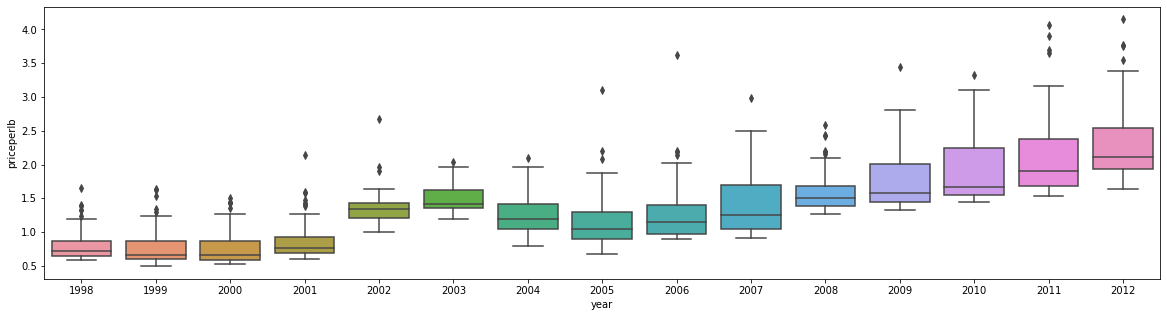

In [90]:
#Boxplot visualization of 'price per lb' vs 'year'
plt.figure(figsize=(20,5))
sns.boxplot(data=honey_df, 
            x='year',
            y='priceperlb',
            )

Slope Chart

https://public.flourish.studio/visualisation/1501374/

# Model Time


In [0]:
#define predictor and target variables 
X = honey_df.groupby('state')['numcol', 'yieldpercol', 'stocks', 'prodvalue'].sum()
y = honey_df.groupby('state')['priceperlb'].sum().values.reshape(-1, 1)

In [0]:
#define predictor and target variables 
X = honey_df.groupby('state')[['prodvalue']].sum()
y = honey_df.groupby('state')['priceperlb'].sum()

In [0]:
#standardization of the data
ss = StandardScaler()
X = ss.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

clf = LinearRegression(normalize=True, n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.intercept_)
print(clf.coef_)

#This means that for every one unit of change in each variable, the change in priceperlb is the coef.

20.42166791176514
[-1.40122241]


# Forecasting


In [0]:
#preprocess for fb prophet
df = honey_df.groupby('year')['totalprod'].sum()
df.index = pd.to_datetime(df.index, format='%Y')
df = df.reset_index()
df.columns = ['ds', 'y']
df.head(2)

,ds,y
0,1998-01-01,219519000.0
1,1999-01-01,202387000.0


In [54]:
import pandas as pd
from fbprophet import Prophet
 
m = Prophet()
m.fit(df)

# make future predictions
future = m.make_future_dataframe(periods=365*2)

#forecast
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


,ds,yhat,yhat_lower,yhat_upper
0,1998-01-01,2.069575e+08,1.932176e+08,2.209927e+08
1,1999-01-01,2.053097e+08,1.905945e+08,2.195542e+08
2,2000-01-01,2.045068e+08,1.902454e+08,2.189784e+08
3,2001-01-01,1.892176e+08,1.739709e+08,2.039383e+08
4,2002-01-01,1.867210e+08,1.716118e+08,2.012352e+08
...,...,...,...,...
740,2013-12-27,3.415329e+08,3.270052e+08,3.564095e+08
741,2013-12-28,2.762840e+08,2.619959e+08,2.908367e+08
742,2013-12-29,2.207986e+08,2.059573e+08,2.361618e+08
743,2013-12-30,1.765577e+08,1.621290e+08,1.914131e+08


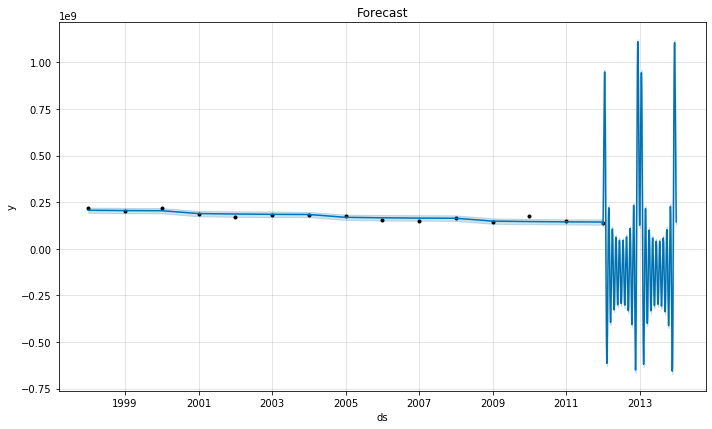

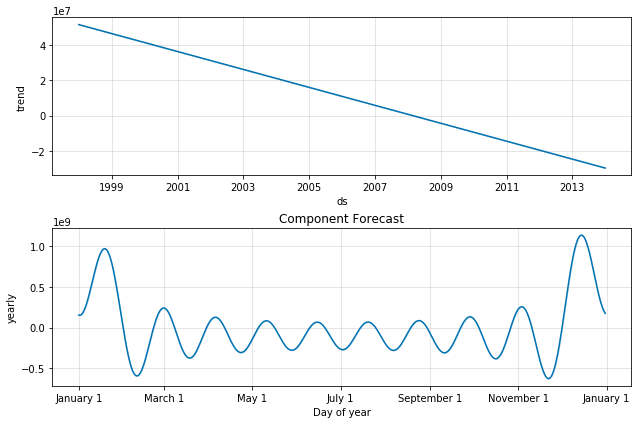

In [58]:
#plot forecast
m.plot(forecast)
plt.title('Forecast');

#plot components
m.plot_components(forecast)
plt.title('Component Forecast');

# Results

# Insights
(after EDA)

* North Dakota, South Dakota, Florida are the top 3 states for honey bee production.
* California was the top honey bee production state in 1998 and has slid down to 4th place in 2012.
* There is a downward trend in honey bee production since 1998.
* Price per lb has gone up since 1998.
* Price per lb has negative correlation with production variables(numcol, yieldpercol, totalprod, stocks).
* California had the highest production increase at rate of 134% in 2010.
* New Jersey had the lowest production decrease at 56% in 2003.
* 


# Questions
(after EDA)

* Is there seasonality in honey bee production?
* What are causes for the downward trend of production?
* Is the price rate of change statistically significant per subsequent years? if so, what factors are causing this?
* Which state had the most production rate fluctuation between 1998-2012?
* which state saw the most production cumulative rate increase between 1998-2012?
* which state had the most production cumulative rate decrease between 1998-2012?
* which state was the most consistent in production rate(not too much highs or lows) between 1998-2012?


# References

1. https://www.kaggle.com/jessicali9530/honey-production
2. https://www.recorder.com/Researchers-take-on-honey-bee-decline-32439863
3. https://www.capitalpress.com/ag_sectors/orchards_nuts_vines/mushroom-extract-might-rescue-bees-from-deadly-virus/article_6ea225da-51de-11ea-b658-f70bea196741.html
4. https://www.we-heart.com/2020/02/28/businesses-working-to-save-the-bees/
5. https://qz.com/india/1805814/how-humans-can-save-bees-from-rapid-urbanisation-global-warming/
